# **Goal of Clustering**
Segment employees based on mental health risk. For example:

**Cluster**    **Description**  
    0	       Low risk: No history, no interference  
    1	       Moderate risk: Interference, no treatment  
    2	       High risk: History + work interference

## 1. Load Libraries and Import Cleaned Data

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


df = pd.read_csv('/home/srs/Desktop/IITM/Projects/mental_health_in_tech/data/processed/mental_health_cleaned.csv')
df.info()
df.describe(include='all')
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1250 non-null   object
 1   Age                        1250 non-null   int64 
 2   Gender                     1250 non-null   object
 3   Country                    1250 non-null   object
 4   state                      1250 non-null   object
 5   self_employed              1250 non-null   object
 6   family_history             1250 non-null   int64 
 7   treatment                  1250 non-null   int64 
 8   work_interfere             1250 non-null   object
 9   no_employees               1250 non-null   object
 10  remote_work                1250 non-null   int64 
 11  tech_company               1250 non-null   object
 12  benefits                   1250 non-null   object
 13  care_options               1250 non-null   object
 14  wellness

Timestamp                    0
Age                          0
Gender                       0
Country                      0
state                        0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
comments                     0
Gender_Encoded               0
Work_Interfere_Encoded       0
Care_Options_Encoded         0
dtype: int64

## 2. Feature Selection and Model Training

In [15]:
features = [
    'Age',
    'Gender_Encoded',                 # Encoded: e.g., Male=0, Female=1, Other=2
    'family_history',         # 1 if yes
    'Work_Interfere_Encoded',         # Encoded: Never=0, Rarely=1, Sometimes=2, Often=3, Unknown=4
    'remote_work',            # 1 if yes
    'Care_Options_Encoded',           # 1 if yes
    'treatment'               # 1 if already sought treatment
]


X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['risk_cluster'] = clusters

## 3. Visualize Clusters

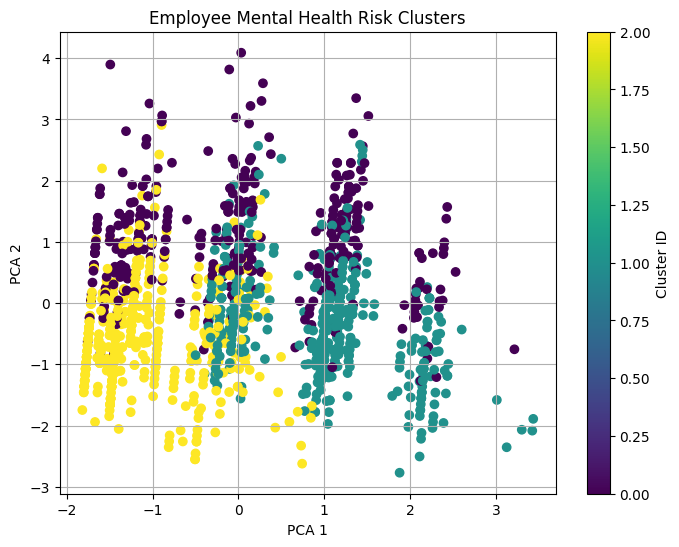

In [16]:
# Used PCA to reduce to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Employee Mental Health Risk Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster ID')
plt.grid(True)
plt.show()

## 4. Interpret the Clusters

In [17]:
cluster_summary = df.groupby('risk_cluster')[features].mean()
print(cluster_summary)


                    Age  Gender_Encoded  family_history  \
risk_cluster                                              
0             33.621622        0.202703        0.400000   
1             32.056054        0.325112        0.578475   
2             30.688940        0.117512        0.188940   

              Work_Interfere_Encoded  remote_work  Care_Options_Encoded  \
risk_cluster                                                              
0                           2.075676          1.0              0.824324   
1                           1.865471          0.0              0.890135   
2                           2.232719          0.0              0.831797   

              treatment  
risk_cluster             
0              0.524324  
1              0.979821  
2              0.000000  


## 5. Save Data to Use in Tableau

In [18]:
df.to_csv('/home/srs/Desktop/IITM/Projects/mental_health_in_tech/data/processed/mental_health_with_clusters.csv', index=False)